In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [3]:

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
from itertools import combinations

In [5]:
import seaborn as sns
sns.set_style("whitegrid")

In [6]:
state = 'NC'

In [7]:
file_symptoms_train = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_train.fea'

noun_sentence_state_train = pd.read_feather(file_symptoms_train)

In [8]:
file_symptoms_test = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_test.fea'
noun_sentence_state_test = pd.read_feather(file_symptoms_test)


In [9]:
noun_sentence_state_test_transdate_train = noun_sentence_state_train.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_train = noun_sentence_state_test_transdate_train.rename(columns={"avmerror": "avmerror_mean"})

In [10]:
noun_sentence_state_test_transdate_test = noun_sentence_state_test.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_test = noun_sentence_state_test_transdate_test.rename(columns={"avmerror": "avmerror_mean"})

In [11]:
noun_sentence_state_train = noun_sentence_state_train.merge(noun_sentence_state_test_transdate_train,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [12]:
noun_sentence_state_test = noun_sentence_state_test.merge(noun_sentence_state_test_transdate_test,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [13]:
noun_sentence_state_train['category_predictand'] = 0
noun_sentence_state_train.loc[noun_sentence_state_train['avmerror']>=0.,'category_predictand'] = 1

In [14]:
noun_sentence_state_test['category_predictand'] = 0
noun_sentence_state_test.loc[noun_sentence_state_test['avmerror']>=0.,'category_predictand'] = 1

In [16]:
selcted_columns = ['cbsa', 'Transdate', 
       'cj_living_area', 'census_tract', 'zip', 
       'avmValue']

In [32]:
selcted_columns_all = ['cbsa', 'Transdate', 
       'cj_living_area', 'census_tract', 'zip', 
       'avmValue', 
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7',
       'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9',
       'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11',
       'AVM_Error_Indicators_scale', 'AVM_Error_Indicators_scale_inverse',
       'Listing_Error_Indicators_0', 'Listing_Error_Indicators_1',
       'Listing_Error_Indicators_2', 'Listing_Error_Indicators_3',
       'Listing_Error_Indicators_4', 'Listing_Error_Indicators_5',
       'Listing_Error_Indicators_6', 'Listing_Error_Indicators_7',
       'Listing_Error_Indicators_8', 'Listing_Error_Indicators_9',
       'Listing_Error_Indicators_10', 'Listing_Error_Indicators_11',
       'AVM_Error_Indicators_0_max_value',
       'AVM_Error_Indicators_0_min_value',
       'AVM_Error_Indicators_0_max_indicator',
       'AVM_Error_Indicators_0_min_indicator',
       'AVM_Error_Indicators_0_diff_indicator',
       'AVM_Error_Indicators_0_diff_value', 'AVM_Error_Indicators_0_mean','avmerror_mean']
selcted_columns_all = selcted_columns_all + list(noun_sentence_state_train.columns[51:-2])
len(selcted_columns_all)

6925

In [33]:
noun_sentence_state_train.columns

Index(['listingid', 'qtr', 'cbsa_div', 'cbsa', 'state', 'Transdate',
       'Transprice', 'cj_living_area', 'fips_code', 'census_tract',
       ...
       'new roof, new stainless steel appliances', 'new roof, new windows',
       'new roof, original hardwood floors',
       'new stainless steel appliances, original hardwood floors',
       'new stainless steel appliances, separate shower',
       'new stainless steel appliances, spacious bedrooms',
       'new stainless steel appliances, tile kitchen',
       'new stainless steel appliances, walkin closet', 'avmerror_mean',
       'category_predictand'],
      dtype='object', length=6938)

In [18]:

all_combinations = []

In [19]:
for i in range(1,len(selcted_columns)+1):
    print(i)
    all_combinations = all_combinations + list(combinations(selcted_columns, i))

1
2
3
4
5
6


In [20]:
for list_preds in all_combinations:
    print(list(list_preds))


['cbsa']
['Transdate']
['cj_living_area']
['census_tract']
['zip']
['avmValue']
['cbsa', 'Transdate']
['cbsa', 'cj_living_area']
['cbsa', 'census_tract']
['cbsa', 'zip']
['cbsa', 'avmValue']
['Transdate', 'cj_living_area']
['Transdate', 'census_tract']
['Transdate', 'zip']
['Transdate', 'avmValue']
['cj_living_area', 'census_tract']
['cj_living_area', 'zip']
['cj_living_area', 'avmValue']
['census_tract', 'zip']
['census_tract', 'avmValue']
['zip', 'avmValue']
['cbsa', 'Transdate', 'cj_living_area']
['cbsa', 'Transdate', 'census_tract']
['cbsa', 'Transdate', 'zip']
['cbsa', 'Transdate', 'avmValue']
['cbsa', 'cj_living_area', 'census_tract']
['cbsa', 'cj_living_area', 'zip']
['cbsa', 'cj_living_area', 'avmValue']
['cbsa', 'census_tract', 'zip']
['cbsa', 'census_tract', 'avmValue']
['cbsa', 'zip', 'avmValue']
['Transdate', 'cj_living_area', 'census_tract']
['Transdate', 'cj_living_area', 'zip']
['Transdate', 'cj_living_area', 'avmValue']
['Transdate', 'census_tract', 'zip']
['Transdate',

In [21]:
import joblib

In [39]:
testing_error_list = []
testingavm_error_list = []

training_error_list = []
trainingavm_error_list = []

In [36]:

symptoms_df = noun_sentence_state_train.loc[:,selcted_columns_all]
symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns_all]

Predictors = symptoms_df.to_numpy()
X_test = symptoms_df_test.to_numpy()
X_train = Predictors
predictand = noun_sentence_state_train.category_predictand.values
y_train = predictand
y_test = noun_sentence_state_test.category_predictand.values

y_train_regressor = noun_sentence_state_train.avmerror.values

    

In [37]:
filename = 'LGBM_regressor_firstStage_'+state+'.sav'
model_regressor = joblib.load(filename)

In [40]:
predictions_train_Regressor = model_regressor.predict(X_train)
predictions_test_Regressor = model_regressor.predict(X_test)
y_test_regressor = noun_sentence_state_test.avmerror.values

avmValue_test = noun_sentence_state_test['avmValue']
avmValue_train = noun_sentence_state_train['avmValue']

transprice_test = noun_sentence_state_test['Transprice']
transprice_train = noun_sentence_state_train['Transprice']

predictions_test_valueR = avmValue_test/(1-predictions_test_Regressor)
predictions_train_valueR = avmValue_train/(1-predictions_train_Regressor)

print('') 
print('Testing')
print(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
          (transprice_test)))
print(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))

testing_error_list.append(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
          (transprice_test)))
testingavm_error_list.append(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))

print('') 
print('Training') 
print(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
          (transprice_train)))
print(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))  

training_error_list.append(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
          (transprice_train)))
trainingavm_error_list.append(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))


Testing
0.10060815707066105
0.11482542789285947

Training
0.08765564973659257
0.11497275549046698


In [45]:
from lightgbm import LGBMRegressor



In [41]:
for idd,list_preds in enumerate(all_combinations):
    print(list(list_preds))
    
    selcted_columns = list_preds
    symptoms_df = noun_sentence_state_train.loc[:,selcted_columns]
    symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns]
    
    Predictors = symptoms_df.to_numpy()
    X_test = symptoms_df_test.to_numpy()
    X_train = Predictors
    predictand = noun_sentence_state_train.category_predictand.values
    y_train = predictand
    y_test = noun_sentence_state_test.category_predictand.values
    
    y_train_regressor = noun_sentence_state_train.avmerror.values
    
    filename =  'LGBM_regressor_NOCOMMENTS_'+state+'_'+str(idd)+'.sav'
    model_regressor = joblib.load(filename)
    
    predictions_train_Regressor = model_regressor.predict(X_train)
    predictions_test_Regressor = model_regressor.predict(X_test)
    
    y_test_regressor = noun_sentence_state_test.avmerror.values
    
    avmValue_test = noun_sentence_state_test['avmValue']
    avmValue_train = noun_sentence_state_train['avmValue']

    transprice_test = noun_sentence_state_test['Transprice']
    transprice_train = noun_sentence_state_train['Transprice']

    predictions_test_valueR = avmValue_test/(1-predictions_test_Regressor)
    predictions_train_valueR = avmValue_train/(1-predictions_train_Regressor)
    
    
    print('') 
    print('Testing')
    print(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
              (transprice_test)))
    print(np.mean(np.abs(transprice_test - avmValue_test)/\
                  (transprice_test)))
    

    testing_error_list.append(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
              (transprice_test)))
    testingavm_error_list.append(np.mean(np.abs(transprice_test - avmValue_test)/\
                  (transprice_test)))

    print('') 
    print('Training') 
    print(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
              (transprice_train)))
    print(np.mean(np.abs(transprice_train - avmValue_train)/\
                  (transprice_train)))      

    training_error_list.append(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
              (transprice_test)))
    trainingavm_error_list.append(np.mean(np.abs(transprice_train - avmValue_train)/\
                  (transprice_train)))
   


['cbsa']

Testing
0.11448760138766934
0.11482542789285947

Training
0.11467054016244699
0.11497275549046698
['Transdate']

Testing
0.11469483804375169
0.11482542789285947

Training
0.1146998186343513
0.11497275549046698
['cj_living_area']

Testing
0.11428215422032698
0.11482542789285947

Training
0.11431683319867367
0.11497275549046698
['census_tract']

Testing
0.11405999635494828
0.11482542789285947

Training
0.11427062938357065
0.11497275549046698
['zip']

Testing
0.11428933974590103
0.11482542789285947

Training
0.11437629108399587
0.11497275549046698
['avmValue']

Testing
0.11340020643356702
0.11482542789285947

Training
0.11340262810749041
0.11497275549046698
['cbsa', 'Transdate']

Testing
0.11408781243632234
0.11482542789285947

Training
0.11209659405800543
0.11497275549046698
['cbsa', 'cj_living_area']

Testing
0.11427885643029805
0.11482542789285947

Training
0.11231316276953471
0.11497275549046698
['cbsa', 'census_tract']

Testing
0.11384969422923241
0.11482542789285947

Train


Testing
0.11280486532304924
0.11482542789285947

Training
0.10665998021298932
0.11497275549046698
['Transdate', 'cj_living_area', 'census_tract', 'zip', 'avmValue']

Testing
0.11071262861106418
0.11482542789285947

Training
0.10127653520238136
0.11497275549046698
['cbsa', 'Transdate', 'cj_living_area', 'census_tract', 'zip', 'avmValue']

Testing
0.11103260254996415
0.11482542789285947

Training
0.10307672205559482
0.11497275549046698


In [42]:
import seaborn as sns
sns.set_theme(style="whitegrid")


<BarContainer object of 64 artists>

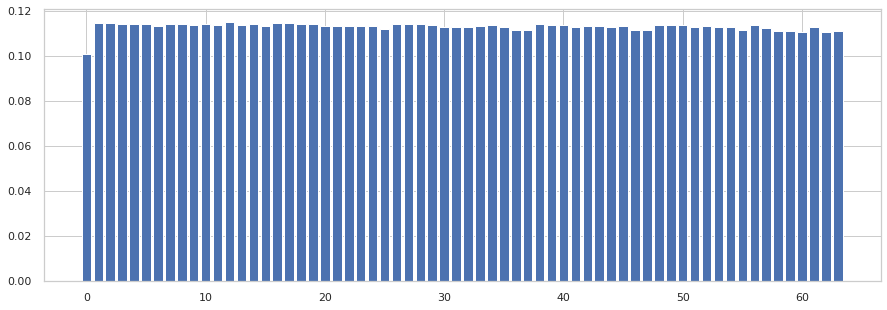

In [58]:
fig = plt.figure(figsize=(15,5))
plt.bar(np.arange(len(testing_error_list)), testing_error_list)

In [57]:
training_error_list[37]

0.11132203815277007

In [74]:
testing_error_list[63]

0.11122608290009445

In [73]:
all_combinations[62]

('cbsa', 'Transdate', 'cj_living_area', 'census_tract', 'zip', 'avmValue')

In [76]:
testing_error_list[36]

0.11122608290009445

In [77]:
all_combinations[35]

('Transdate', 'census_tract', 'avmValue')

In [81]:
np.array(testing_error_list[1:]).min()

0.11045717561178842

In [84]:
[np.array(testing_error_list)==np.array(testing_error_list[1:]).min()]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False])]

In [86]:
testing_error_list[60]

0.11045717561178842

In [87]:
all_combinations[59]

('cbsa', 'Transdate', 'census_tract', 'zip', 'avmValue')

In [88]:
filename =  'LGBM_regressor_NOCOMMENTS_'+state+'_59.sav'
model_regressor = joblib.load(filename)

In [89]:
model_regressor

LGBMRegressor(colsample_bytree=0.4, max_depth=10, n_estimators=150,
              num_leaves=700)

In [92]:
importances = model_regressor.feature_importances_
indices = np.argsort(importances)
selcted_columns = all_combinations[59]
features = selcted_columns

In [93]:
for element in np.array(features)[indices]:
    print(element)

cbsa
zip
census_tract
Transdate
avmValue


In [49]:
for idd,list_preds in enumerate(all_combinations):
    print(list(list_preds))

    selcted_columns = list(list_preds) + ['ListingPrice'] 
    symptoms_df = noun_sentence_state_train.loc[:,selcted_columns]
    symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns]
    
    Predictors = symptoms_df.to_numpy()
    X_test = symptoms_df_test.to_numpy()
    X_train = Predictors
    predictand = noun_sentence_state_train.category_predictand.values
    y_train = predictand
    y_test = noun_sentence_state_test.category_predictand.values
    
    y_train_regressor = noun_sentence_state_train.avmerror.values
    
    model_regressor = LGBMRegressor(max_depth = 10, n_estimators = 150, num_leaves = 700, colsample_bytree=0.4) 

    model_regressor.fit(X_train, y_train_regressor)
    
    predictions_train_Regressor = model_regressor.predict(X_train)
    predictions_test_Regressor = model_regressor.predict(X_test)
    
    y_test_regressor = noun_sentence_state_test.avmerror.values
    
    avmValue_test = noun_sentence_state_test['avmValue']
    avmValue_train = noun_sentence_state_train['avmValue']

    transprice_test = noun_sentence_state_test['Transprice']
    transprice_train = noun_sentence_state_train['Transprice']

    predictions_test_valueR = avmValue_test/(1-predictions_test_Regressor)
    predictions_train_valueR = avmValue_train/(1-predictions_train_Regressor)
    
    
    print('') 
    print('Testing')
    print(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
              (transprice_test)))
    print(np.mean(np.abs(transprice_test - avmValue_test)/\
                  (transprice_test)))

    print('') 
    print('Training') 
    print(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
              (transprice_train)))
    print(np.mean(np.abs(transprice_train - avmValue_train)/\
                  (transprice_train)))   
    
    import joblib
    filename = 'LGBM_regressor_NOCOMMENTS_with_listing'+state+'_'+str(idd)+'.sav'
    joblib.dump(model_regressor,filename)
    
    

['cbsa']

Testing
0.11289037747517315
0.11482542789285947

Training
0.11141823689780816
0.11497275549046698
['Transdate']

Testing
0.11389434245623421
0.11482542789285947

Training
0.11044661799712448
0.11497275549046698
['cj_living_area']

Testing
0.11000501613922321
0.11482542789285947

Training
0.10702739967923904
0.11497275549046698
['census_tract']

Testing
0.11203212044844542
0.11482542789285947

Training
0.10853065124657087
0.11497275549046698
['zip']

Testing
0.11216351597169158
0.11482542789285947

Training
0.10886323229270017
0.11497275549046698
['avmValue']

Testing
0.048680895592224514
0.11482542789285947

Training
0.047111193832070554
0.11497275549046698
['cbsa', 'Transdate']

Testing
0.11173311389220957
0.11482542789285947

Training
0.10785520175647466
0.11497275549046698
['cbsa', 'cj_living_area']

Testing
0.10672269113592683
0.11482542789285947

Training
0.1017165488849212
0.11497275549046698
['cbsa', 'census_tract']

Testing
0.11168845280467726
0.11482542789285947

Tra


Testing
0.06691933422195348
0.11482542789285947

Training
0.061825564949516645
0.11497275549046698
['Transdate', 'cj_living_area', 'census_tract', 'zip', 'avmValue']

Testing
0.06630110014708405
0.11482542789285947

Training
0.05965917670586652
0.11497275549046698
['cbsa', 'Transdate', 'cj_living_area', 'census_tract', 'zip', 'avmValue']

Testing
0.05789372519174789
0.11482542789285947

Training
0.049186858130227246
0.11497275549046698


In [ ]:
for idd,list_preds in enumerate(all_combinations):
    print(list(list_preds))

    selcted_columns = list(list_preds) + ['avmerror_mean'] 
    symptoms_df = noun_sentence_state_train.loc[:,selcted_columns]
    symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns]
    
    Predictors = symptoms_df.to_numpy()
    X_test = symptoms_df_test.to_numpy()
    X_train = Predictors
    predictand = noun_sentence_state_train.category_predictand.values
    y_train = predictand
    y_test = noun_sentence_state_test.category_predictand.values
    
    y_train_regressor = noun_sentence_state_train.avmerror.values
    
    model_regressor = LGBMRegressor(max_depth = 10, n_estimators = 150, num_leaves = 700, colsample_bytree=0.4) 

    model_regressor.fit(X_train, y_train_regressor)
    
    predictions_train_Regressor = model_regressor.predict(X_train)
    predictions_test_Regressor = model_regressor.predict(X_test)
    
    y_test_regressor = noun_sentence_state_test.avmerror.values
    
    avmValue_test = noun_sentence_state_test['avmValue']
    avmValue_train = noun_sentence_state_train['avmValue']

    transprice_test = noun_sentence_state_test['Transprice']
    transprice_train = noun_sentence_state_train['Transprice']

    predictions_test_valueR = avmValue_test/(1-predictions_test_Regressor)
    predictions_train_valueR = avmValue_train/(1-predictions_train_Regressor)
    
    
    print('') 
    print('Testing')
    print(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
              (transprice_test)))
    print(np.mean(np.abs(transprice_test - avmValue_test)/\
                  (transprice_test)))

    print('') 
    print('Training') 
    print(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
              (transprice_train)))
    print(np.mean(np.abs(transprice_train - avmValue_train)/\
                  (transprice_train)))   
    
    import joblib
    filename = 'LGBM_regressor_NOCOMMENTS_with_avmerror_mean'+state+'_'+str(idd)+'.sav'
    joblib.dump(model_regressor,filename)

['cbsa']

Testing
0.11471604317306178
0.11482542789285947

Training
0.11234328107722216
0.11497275549046698
['Transdate']

Testing
0.11471267222324295
0.11482542789285947

Training
0.11465380127905823
0.11497275549046698
['cj_living_area']

Testing
0.11490569705806422
0.11482542789285947

Training
0.11039878740810813
0.11497275549046698
['census_tract']

Testing
0.11466148097756391
0.11482542789285947

Training
0.11005289369430107
0.11497275549046698
['zip']

Testing
0.11487074218353019
0.11482542789285947

Training
0.1102460385871795
0.11497275549046698
['avmValue']

Testing
0.11333119095069812
0.11482542789285947

Training
0.1086149311280379
0.11497275549046698
['cbsa', 'Transdate']

Testing
0.1138623036852275
0.11482542789285947

Training
0.11170347847428592
0.11497275549046698
['cbsa', 'cj_living_area']

Testing
0.11380460480478415
0.11482542789285947

Training
0.10889248783120094
0.11497275549046698
['cbsa', 'census_tract']

Testing
0.11405994082920042
0.11482542789285947

Trainin

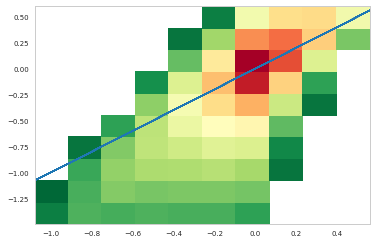

In [27]:
from matplotlib import colors
plt.hist2d(predictions_train_Regressor, y_train_regressor, bins=10, cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.plot(y_train_regressor,y_train_regressor)

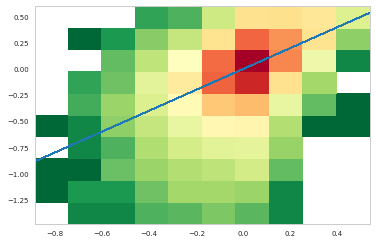

In [30]:
plt.hist2d(predictions_test_Regressor, y_test_regressor, bins=10, cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.plot(y_test_regressor,y_test_regressor)

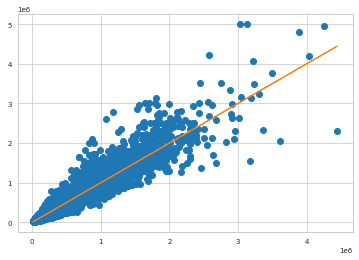

In [32]:


print('') 
fig = plt.figure()
plt.plot(predictions_test_valueR, 
     transprice_test,'o')
plt.plot(predictions_test_valueR,predictions_test_valueR)



Testing
0.10060815707066105
0.11482542789285947

Training
0.08765564973659257
0.11497275549046698


In [57]:
len(noun_sentence_state_train)

193294

In [58]:
len(symptoms_df)

193294

In [93]:
symptoms_df['ListingPrice'] = noun_sentence_state_train['ListingPrice']
symptoms_df_test['ListingPrice'] = noun_sentence_state_test['ListingPrice']


In [94]:
symptoms_df['AVM-LISTING'] = symptoms_df['avmValue']-symptoms_df['ListingPrice']
symptoms_df_test['AVM-LISTING'] = symptoms_df_test['avmValue']-symptoms_df_test['ListingPrice']

In [95]:
X_test_trial3 = symptoms_df_test[trial_columns+['ListingPrice','AVM-LISTING']].to_numpy()
X_train_trial3 = symptoms_df[trial_columns+['ListingPrice','AVM-LISTING']].to_numpy()
y_train_trial3 = noun_sentence_state_train.category_predictand.values
y_test_trial3 = noun_sentence_state_test.category_predictand.values
y_train_trial_regressor3 = noun_sentence_state_train.avmerror.values
y_test_trial_regressor3 = noun_sentence_state_test.avmerror.values

In [96]:
model_regressor_trial3 = LGBMRegressor(max_depth = 7, n_estimators = 500, num_leaves = 100, colsample_bytree=0.6) 

In [97]:
model_regressor_trial3.fit(X_train_trial3, y_train_trial_regressor3)

LGBMRegressor(colsample_bytree=0.6, max_depth=7, n_estimators=500,
              num_leaves=100)

In [98]:
predictions_train_Regressor_trial3 = model_regressor_trial3.predict(X_train_trial3)

In [99]:
predictions_test_Regressor_trial3 = model_regressor_trial3.predict(X_test_trial3)

In [100]:
predictions_test_valueR_trail3 = avmValue_test/(1-predictions_test_Regressor_trial3)
predictions_train_valueR_trail3 = avmValue_train/(1-predictions_train_Regressor_trial3)

In [101]:

listingprice_test = noun_sentence_state_test['ListingPrice']
listingprice_train = noun_sentence_state_train['ListingPrice']

In [102]:
print('') 
print('Testing')
print(np.mean(np.abs(transprice_test-predictions_test_valueR_trail3)/\
          (transprice_test)))
print(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))
print(np.mean(np.abs(transprice_test - listingprice_test)/\
              (transprice_test)))

print('') 
print('Training') 
print(np.mean(np.abs(transprice_train-predictions_train_valueR_trail3)/\
          (transprice_train)))
print(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))  
print(np.mean(np.abs(transprice_train - listingprice_train)/\
              (transprice_train)))  


Testing
0.04450811882858361
0.11482542789285947
0.04972884906677244

Training
0.03838529210288449
0.11497275549046698
0.050066197122687645


## DATA FOR THU

In [104]:
noun_sentence_state_test['Train/Test'] = 'Test'
noun_sentence_state_train['Train/Test'] = 'Train'

In [105]:
predictions_test_valueR

0        229290.909427
1        265593.814990
2        252725.111850
3        286902.325985
4        206903.654098
             ...      
82836    435686.997993
82837    375507.744491
82838    212073.633156
82839    299961.640663
82840    231031.362195
Name: avmValue, Length: 82841, dtype: float64

In [106]:
noun_sentence_state_test['avmvalue_modified02'] = predictions_test_valueR
noun_sentence_state_train['avmvalue_modified02'] = predictions_train_valueR

In [107]:
noun_sentence_state_test['avmvalue_modified01'] = predictions_test_valueR_trail
noun_sentence_state_train['avmvalue_modified01'] = predictions_train_valueR_trail

In [108]:
noun_sentence_state_test['avmvalue_withListingPrice'] = predictions_test_valueR_trail3
noun_sentence_state_train['avmvalue_withListingPrice'] = predictions_train_valueR_trail3

In [109]:
noun_sentence_state_full = noun_sentence_state_train.copy(deep=True)

In [110]:
noun_sentence_state_full = noun_sentence_state_full.append(noun_sentence_state_test)

In [111]:
len(noun_sentence_state_full)

276135

In [112]:
noun_sentence_state_full = noun_sentence_state_full.sort_values('Transdate')

In [113]:
noun_sentence_state_full.columns[:17]

Index(['listingid', 'qtr', 'cbsa_div', 'cbsa', 'state', 'Transdate',
       'Transprice', 'cj_living_area', 'fips_code', 'census_tract', 'zip',
       'ListingPrice', 'avmValue', 'avmerror', 'AVM_Error_List',
       'Listing_Error_List', 'AVM_Error_Indicators_0'],
      dtype='object')

In [114]:
df_Thu = noun_sentence_state_full[['listingid', 'qtr', 'cbsa_div', 'cbsa', 'state', 'Transdate',
       'Transprice', 'cj_living_area', 'fips_code', 'census_tract', 'zip',
       'ListingPrice', 'avmValue', 'avmerror','Train/Test','avmvalue_modified01','avmvalue_modified02',
                         'avmvalue_withListingPrice']]

In [115]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_for_Thu_01.fea'
df_Thu.reset_index().to_feather(file_symptoms)

In [116]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_for_Thu_01.csv'
df_Thu.reset_index().to_csv(file_symptoms)